In [103]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import statsmodels.api as sm 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
data = pd.read_csv("C:/Users/VANISHA CHOUDHARY/Downloads/tips (data for regression problem).csv")  

# Data Exploration and Visualization 

In [106]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [107]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [108]:
print(data.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [109]:
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


studying the features

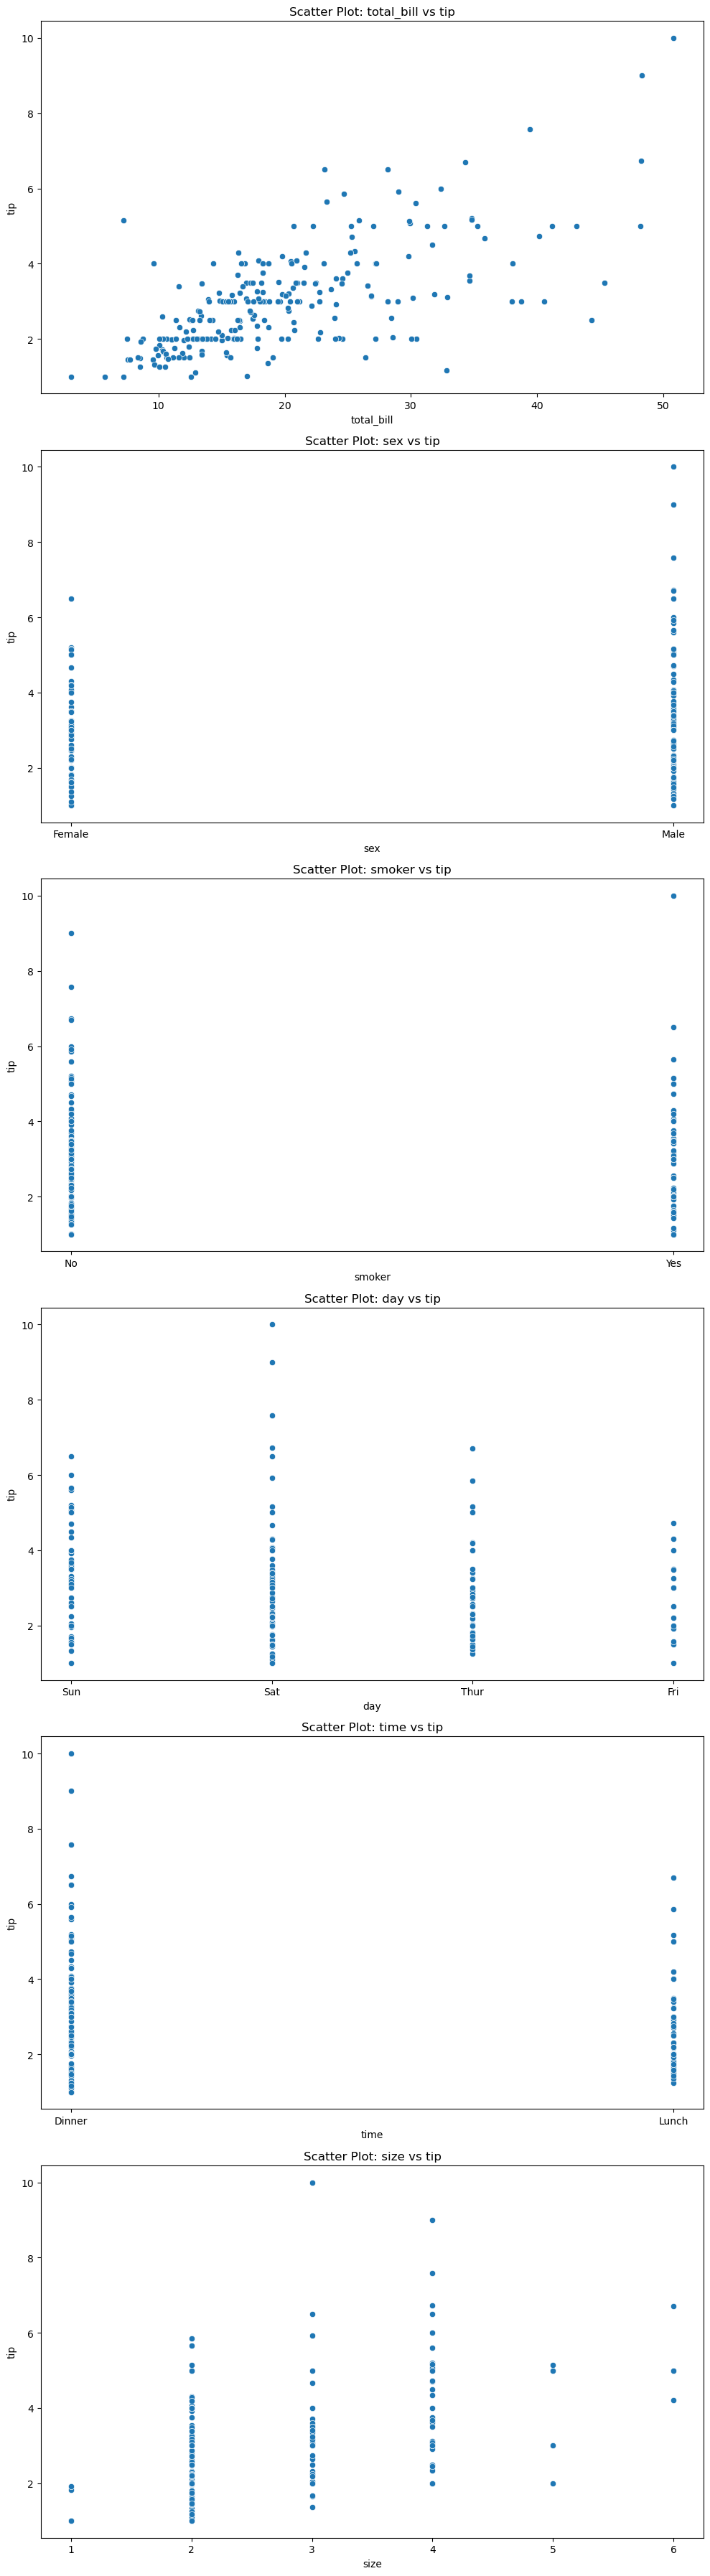

In [111]:
target = 'tip'
predictors = data.columns.drop(target)  
plt.figure(figsize=(10, 6 * len(predictors))) 

for i, predictor in enumerate(predictors, 1):
    plt.subplot(len(predictors), 1, i)
    sns.scatterplot(x=data[predictor], y=data[target])
    plt.title(f"Scatter Plot: {predictor} vs {target}")
    plt.xlabel(predictor)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

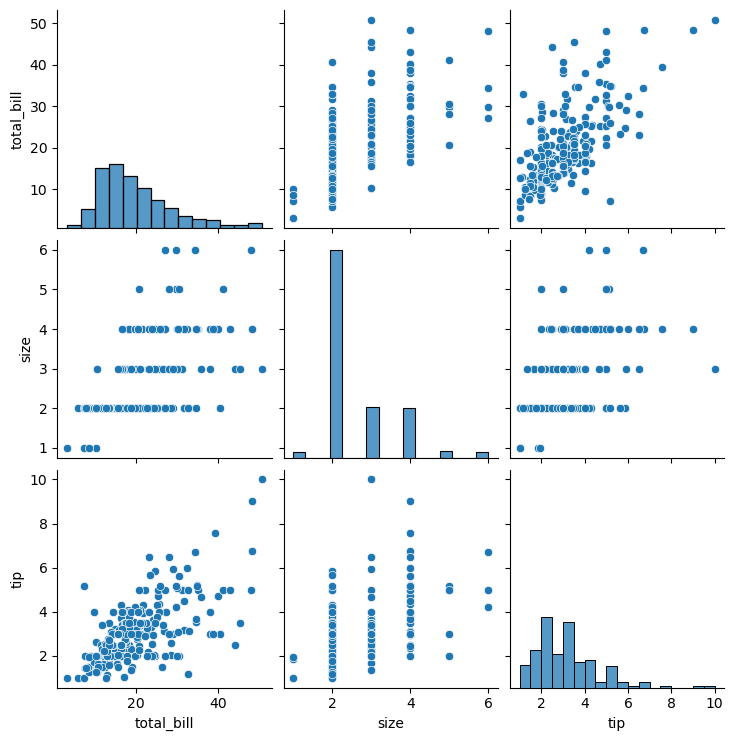

In [112]:
# Pair Plot for multiple features
sns.pairplot(data[['total_bill', 'size', 'tip']])
plt.show()

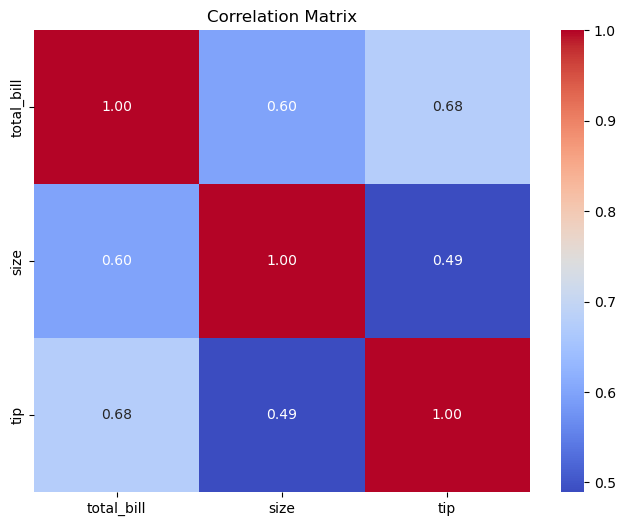

In [113]:
# Correlation Matrix (Heatmap)
corr_matrix = data[['total_bill', 'size', 'tip']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

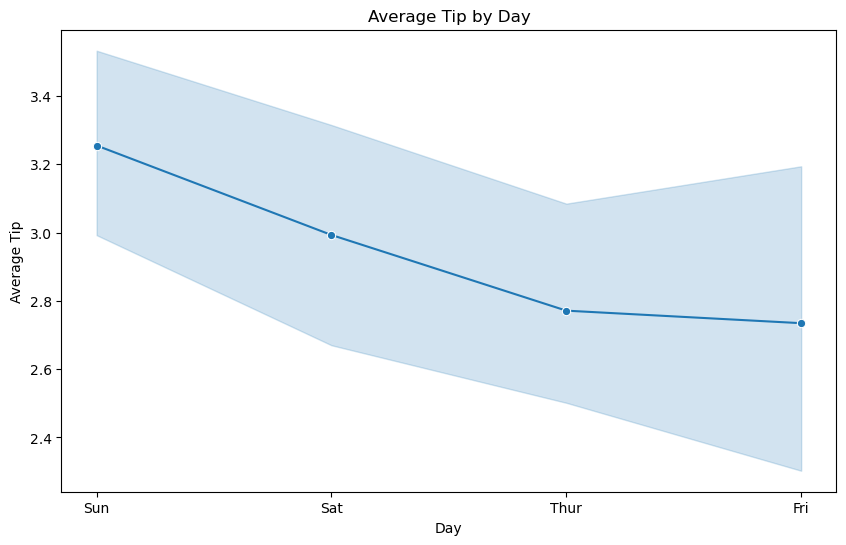

In [114]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

In [115]:
label_encoder = LabelEncoder()

data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['day'] = label_encoder.fit_transform(data['day'])
data['time'] = label_encoder.fit_transform(data['time'])

X = data.drop(columns=['tip']) 
y = data['tip']

In [116]:
X_with_const = sm.add_constant(X)

model = sm.OLS(y, X_with_const).fit()


from statsmodels.stats.diagnostic import linear_rainbow
rainbow_stat, rainbow_p_value = linear_rainbow(model)

print("Rainbow test statistic:", rainbow_stat)
print("Rainbow test p-value:", rainbow_p_value)

Rainbow test statistic: 1.2036274510126597
Rainbow test p-value: 0.15798464222013167


The Rainbow test checks whether a linear regression model is appropriate for the data, assessing if the relationship between predictors and the target variable is sufficiently linear.

Null Hypothesis (H₀): The regression is correctly modeled as linear.
Alternative Hypothesis (H₁): The regression is not correctly modeled as linear.
Interpretation: Since the p-value (0.1580) is greater than 0.05, we fail to reject the null hypothesis.

Residuals

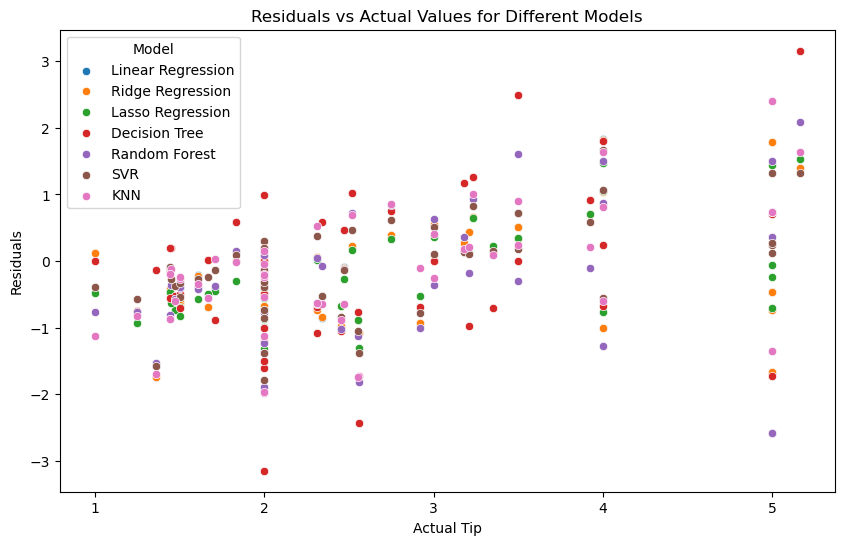

In [119]:
residuals = {
    "Linear Regression": y_test - y_pred_linear,
    "Ridge Regression": y_test - y_pred_ridge,
    "Lasso Regression": y_test - y_pred_lasso,
    "Decision Tree": y_test - y_pred_dt,
    "Random Forest": y_test - y_pred_rf,
    "SVR": y_test - y_pred_svr,
    "KNN": y_test - y_pred_knn
}

# Plotting Residuals for each model
plt.figure(figsize=(10, 6))
for model_name, residual in residuals.items():
    sns.scatterplot(x=y_test, y=residual, label=model_name)
plt.title("Residuals vs Actual Values for Different Models")
plt.xlabel("Actual Tip")
plt.ylabel("Residuals")
plt.legend(title="Model")
plt.show()

# Regression


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:
# Regression Models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Evaluating  Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression -\nMSE:", mse_lr, "\nR^2:", r2_lr, "\nRMSE:", rmse_lr)


Linear Regression -
MSE: 0.694812968628771 
R^2: 0.4441368826121932 
RMSE: 0.8335544185167343


In [125]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluating Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("Ridge Regression -\nMSE:", mse_ridge, "\nR^2:", r2_ridge, "\nRMSE:", rmse_ridge)

Ridge Regression -
MSE: 0.6927491774762523 
R^2: 0.44578795338299415 
RMSE: 0.8323155516246541


In [126]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluating Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("Lasso Regression -\nMSE:", mse_lasso, "\nR^2:", r2_lasso, "\nRMSE:", rmse_lasso)

Lasso Regression -
MSE: 0.5908528649971524 
R^2: 0.5273068720881755 
RMSE: 0.768669542129225


In [127]:
# 4. Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print("Decision Tree Regression -\nMSE:", mse_dt, "\nR^2:", r2_dt, "\nRMSE:", rmse_dt)


Decision Tree Regression -
MSE: 1.413408163265306 
R^2: -0.1307524517346701 
RMSE: 1.1888684381651764


In [128]:
# 5. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest Regression -\nMSE:", mse_rf, "\nR^2:", r2_rf, "\nRMSE:", rmse_rf)


Random Forest Regression -
MSE: 0.9625607446938791 
R^2: 0.2299337514142753 
RMSE: 0.9811018013916186


In [129]:
# 6. Support Vector Regression (SVR)
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train)  
y_pred_svr = svr_reg.predict(X_test_scaled)  
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print("Support Vector Regression (SVR) -\nMSE:", mse_svr, "\nR^2:", r2_svr, "\nRMSE:", rmse_svr)


Support Vector Regression (SVR) -
MSE: 0.717650415124031 
R^2: 0.42586650658987246 
RMSE: 0.8471424998924508


In [130]:
# 7. K-Nearest Neighbors (KNN)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
print("K-Nearest Neighbors (KNN) -\nMSE:", mse_knn, "\nR^2:", r2_knn, "\nRMSE:", rmse_knn)

K-Nearest Neighbors (KNN) -
MSE: 0.8382265306122448 
R^2: 0.3294034029001649 
RMSE: 0.9155471209130881


In [131]:

# X = data.drop(columns=["target_column"])
# y = data["target_column"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
svr_model = SVR()
knn_model = KNeighborsRegressor()

# Training each model and making predictions
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluating models using MSE and R2 Score
models = {
    "Linear Regression": y_pred_linear,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVR": y_pred_svr,
    "KNN": y_pred_knn
}

for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")


Linear Regression - MSE: 0.69, R2 Score: 0.44
Ridge Regression - MSE: 0.69, R2 Score: 0.45
Lasso Regression - MSE: 0.57, R2 Score: 0.55
Decision Tree - MSE: 1.43, R2 Score: -0.14
Random Forest - MSE: 0.94, R2 Score: 0.25
SVR - MSE: 0.54, R2 Score: 0.57
KNN - MSE: 0.84, R2 Score: 0.33


In [132]:
#Insights for Management
# Based on the feature importance or coefficients, we can provide insights
# For Random Forest
feature_importances = rf_reg.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)


print("Feature Importance based on Random Forest:")
print(importance_df)


Feature Importance based on Random Forest:
      Feature  Importance
0  total_bill    0.768877
2      smoker    0.070987
3         day    0.060513
5        size    0.059022
1         sex    0.026900
4        time    0.013701


Model Prediction Accuracy

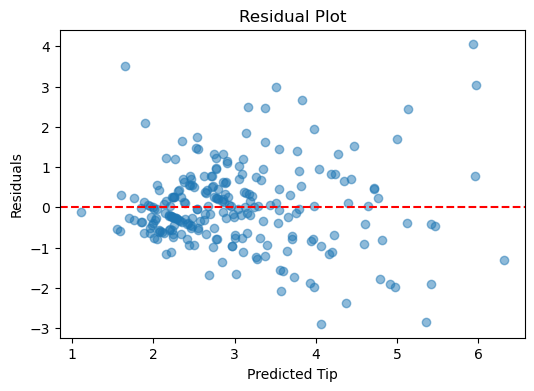

In [134]:
# Residual plot
y_pred = model.predict(X_with_const)
residuals = y - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

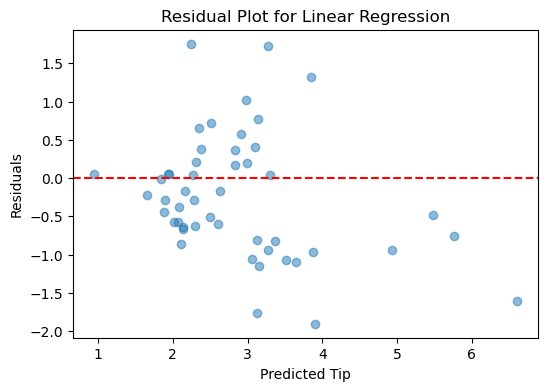

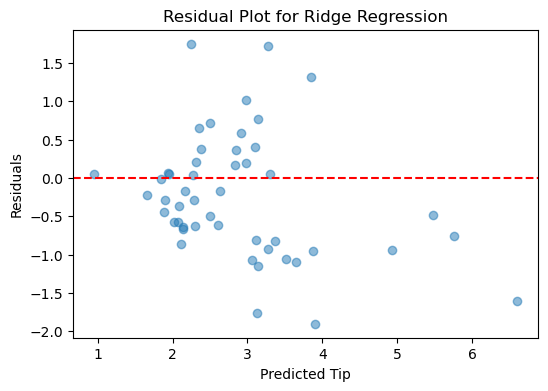

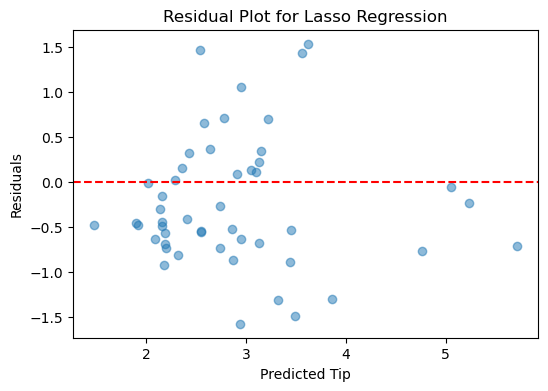

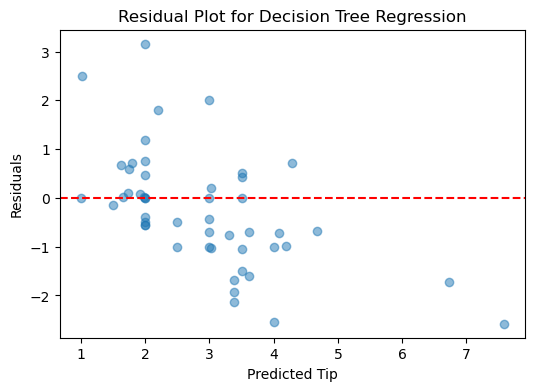

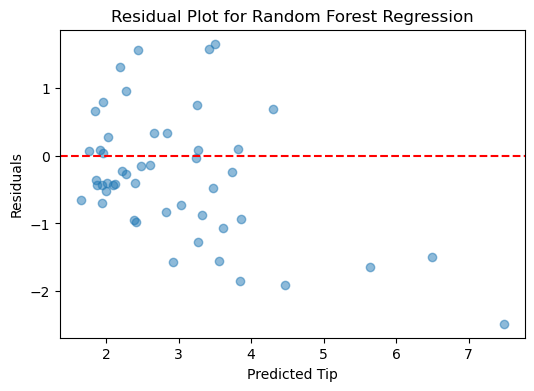

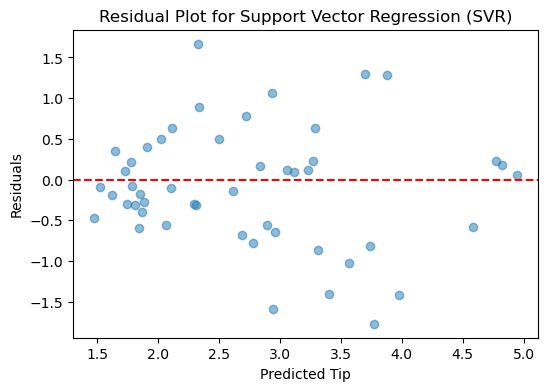

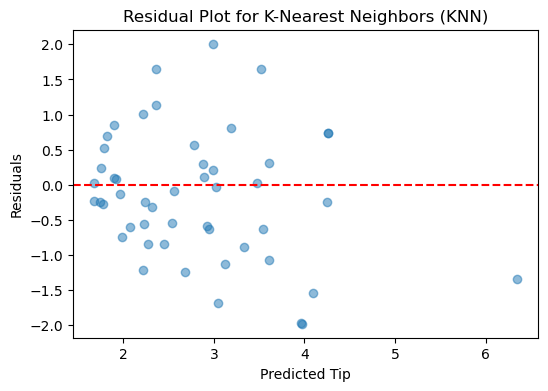

In [169]:
def plot_residuals_graph(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Tip')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {model_name}')
    plt.show()

# 1. Linear Regression Residual Plot
plot_residuals_graph(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression Residual Plot
plot_residuals_graph(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression Residual Plot
plot_residuals_graph(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression Residual Plot
plot_residuals_graph(y_test, y_pred_dt, "Decision Tree Regression")

# 5. Random Forest Regression Residual Plot
plot_residuals_graph(y_test, y_pred_rf, "Random Forest Regression")

# 6. Support Vector Regression (SVR) Residual Plot
plot_residuals_graph(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors (KNN) Residual Plot
plot_residuals_graph(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")

# Conclusion
Decision Tree Regression: The decision tree model has the least residuals, indicating potential overfitting. Simplifying the model could improve generalization.

Service Focus on Sundays: Higher tips are observed on Sundays, so the business should allocate top-tier service during this day.

Improve Service on Fridays: Fridays have lower tips, suggesting the need for better service quality on this day.

Prioritize Dinner Time: Tips are higher during dinner, so focusing on quality service in the evening is key.

Larger Groups Tip More: Larger tables tend to tip better, so the business should prioritize them with personalized services.

Total Bill Correlation: Higher bills lead to higher tips. Encouraging upselling can increase both the total bill and tip amounts.

